# Introduction


Linear Regression is a method for discovering the relationship between two variables in the dataset, such as price of the car and the year it was made. Data Scientists rely on this method for solving a wide range of problems, especially when it comes to prediction.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk(r'C:\Users\mysore\Desktop\car data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\mysore\Desktop\car data\app.py.ipynb
C:\Users\mysore\Desktop\car data\car data.csv
C:\Users\mysore\Desktop\car data\CAR DETAILS FROM CAR DEKHO.csv
C:\Users\mysore\Desktop\car data\logo.png
C:\Users\mysore\Desktop\car data\modal.pickle
C:\Users\mysore\Desktop\car data\Recommender System for Car Selection.ipynb
C:\Users\mysore\Desktop\car data\Vehicle-Price-Predictor using ML With Multiple Algorithm.ipynb
C:\Users\mysore\Desktop\car data\.ipynb_checkpoints\app.py-checkpoint.ipynb
C:\Users\mysore\Desktop\car data\.ipynb_checkpoints\Recommender System for Car Selection-checkpoint.ipynb
C:\Users\mysore\Desktop\car data\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:\Users\mysore\Desktop\car data\.ipynb_checkpoints\Vehicle-Price-Predictor using ML With Multiple Algorithm-checkpoint.ipynb
C:\Users\mysore\Desktop\car data\templates\index.html


# Fetching the Data
Using Pandas to load the dataset into this notebook. Using pandas we can read our datafile (car data.csv) with the line below. Data-set loaded will be assigned to the variable vehicles.

In [2]:
#load dataset and assign it to a variable
vehicles=pd.read_csv(r"C:\Users\mysore\Desktop\car data\car data.csv")

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [4]:
vehicles.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
vehicles.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Exploratory Data Analysis(EDA)

# Visualizing the categorical data :

 # 1. Owner Type

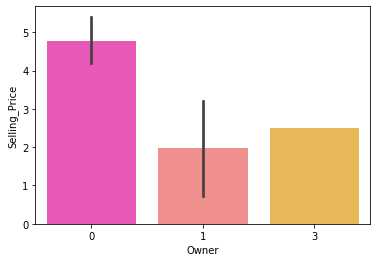

In [6]:
sns.barplot(x='Owner',y='Selling_Price',data=vehicles,palette='spring')

# 2. Transmission Type

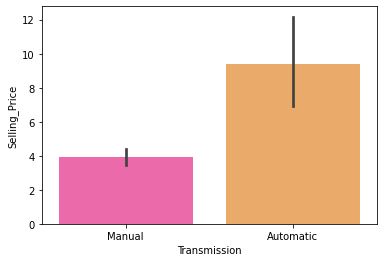

In [7]:
sns.barplot(x='Transmission',y='Selling_Price',data=vehicles,palette='spring')


We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.

# Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age :

# 1. Kms Driven

<Figure size 720x720 with 0 Axes>

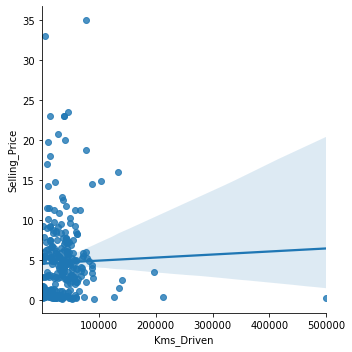

In [8]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=vehicles)

# 2. Present Price

<Figure size 720x720 with 0 Axes>

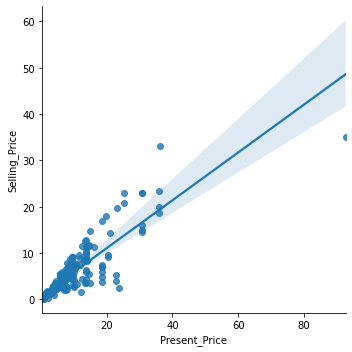

In [9]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=vehicles)

# 3. Vehicle Age

In [10]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
vehicles['Vehicle_Age']=2020- vehicles['Year']

#check out the newly added column
vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


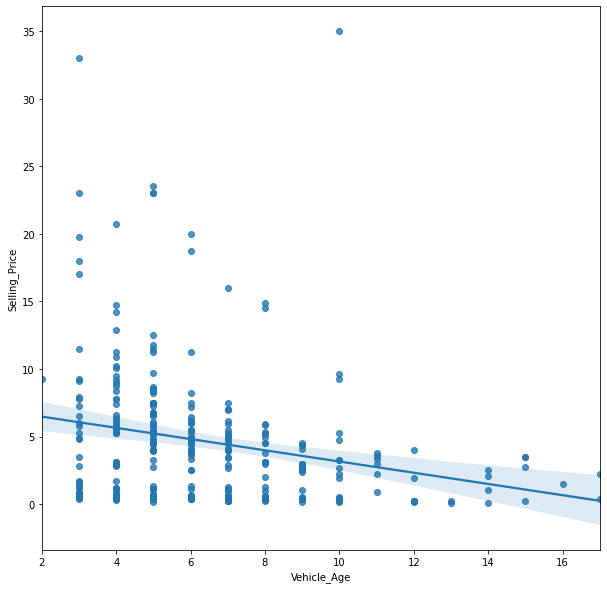

In [11]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=vehicles)

It seems the selling price decreases overall for older/ageing vehicles!

# Feature Engineering
We shall convert categorical features to numeric type!

In [12]:
#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
vehicles=pd.get_dummies(vehicles,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
vehicles.drop(columns=['Year','Car_Name'],inplace=True)

#check out the dataset with new changes
vehicles.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


<br>1.Fuel attribute is now divided into two new attributes where '01' denotes Petrol, '10' denotes Diesel and '00' denotes CNG.</br>
<br>2.Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.</br>
<br>3.Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer and '0' Seller_Type_Individual.</br>

# Understanding and Visualizing Correlations amongst the features

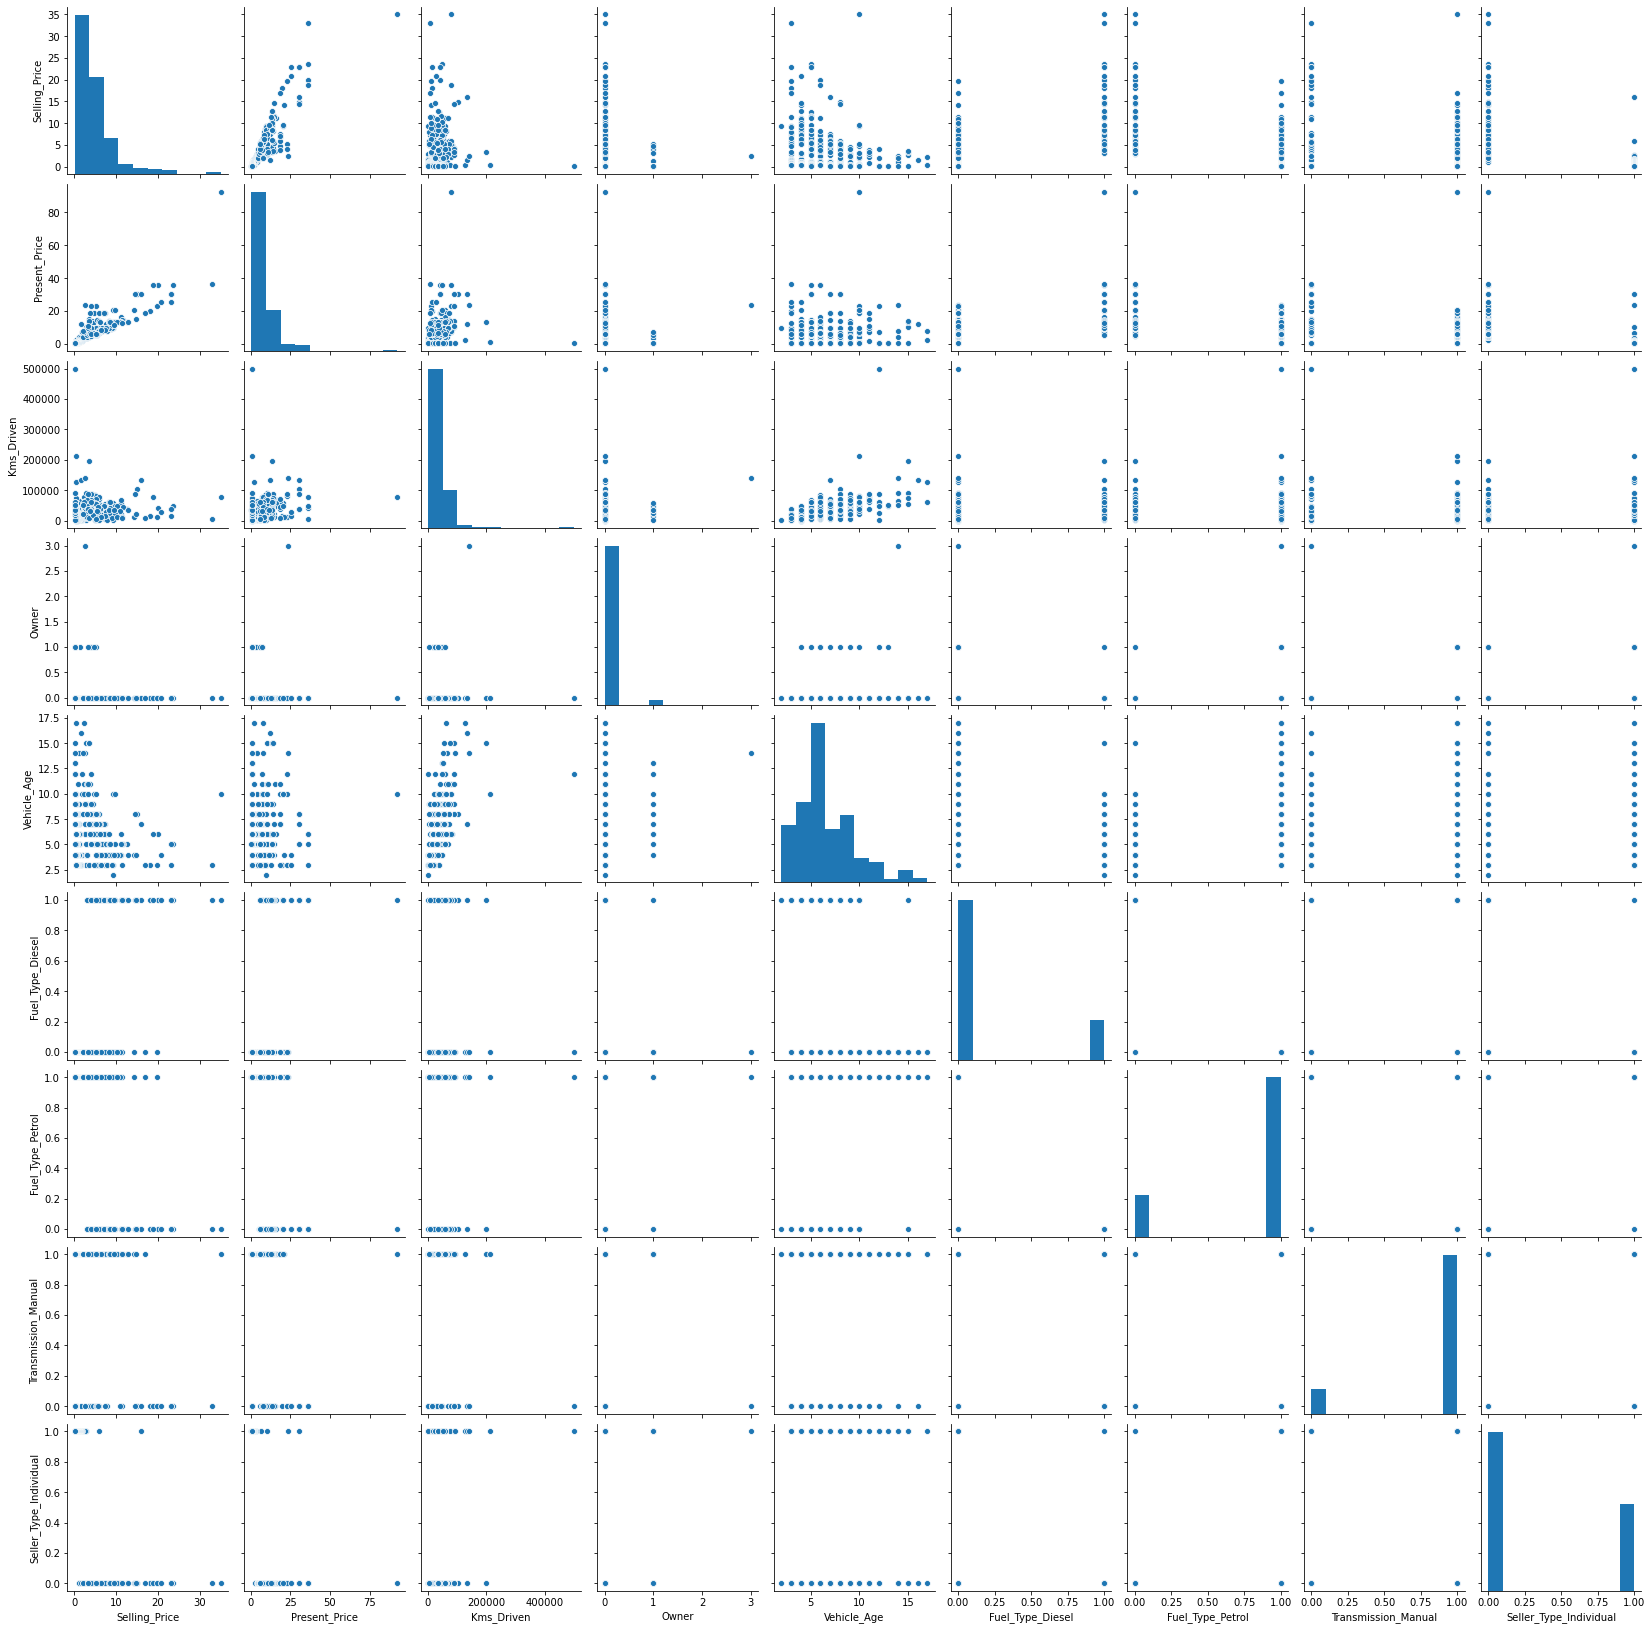

In [13]:
sns.pairplot(vehicles)

The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features.
Selling price seems to be considerably correlated with the Present Price feature.

# Correlation HeatMap

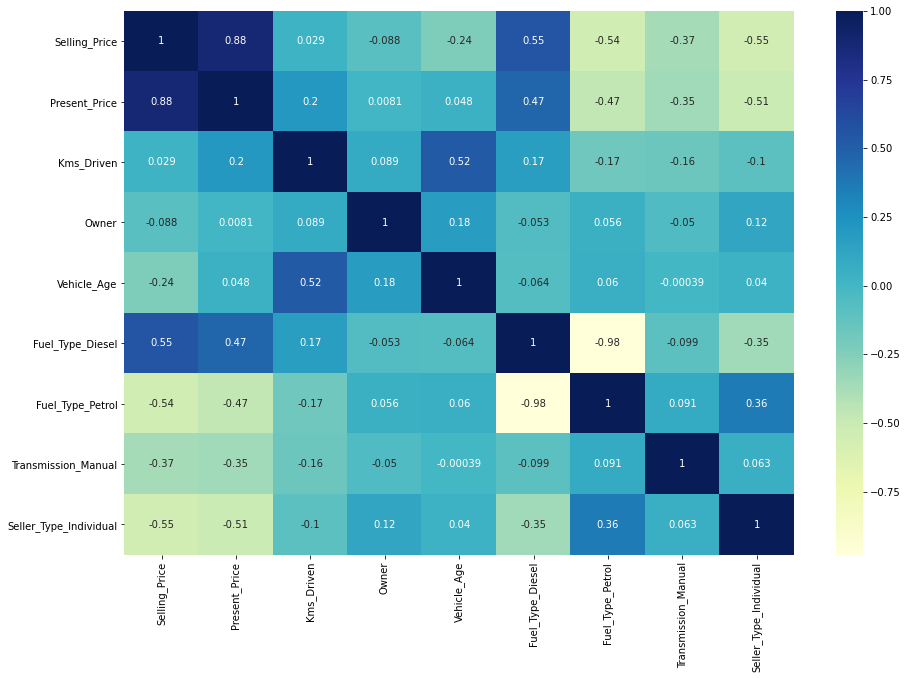

In [14]:
correlations = vehicles.corr()

indx=correlations.index
plt.figure(figsize=(15,10))
sns.heatmap(vehicles[indx].corr(),annot=True,cmap="YlGnBu")

# Training our Linear Regression Model

 Let's now begin to train out regression model! We will need to first split up our data into an vehicles_train array that contains the part of dataset used for training data, and a vehicles_test array used for test data.

# 1. Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
vehicles_train,vehicles_test = train_test_split(vehicles, test_size=0.3, random_state=100)

# We'll perform feature scaling to ensure normalization of the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#features we need to scale are assigned as a list.
var=['Selling_Price','Present_Price','Kms_Driven','Vehicle_Age']

#scaling the training data(fitting the parameters and transforming the values)
vehicles_train[var]=scaler.fit_transform(vehicles_train[var])

#transforming the test data.We avoid fitting the values to prevent data leakage!
vehicles_test[var]=scaler.transform(vehicles_test[var])

#We will toss out the Car_Name column from training and test data because it only has text info that the linear regression model can't use!

X_test=vehicles_test.drop(columns=['Selling_Price'],axis=1)
y_test=vehicles_test['Selling_Price']

X_train=vehicles_train.drop(columns=['Selling_Price'],axis=1)
y_train=vehicles_train['Selling_Price']


# 2. Creating and Training the Model

In [16]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

# 3. Model Evaluation

In [17]:
# print the intercept of best-fit line
print(lm.intercept_)

0.1785729462664924


In [18]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=vehicles.drop(columns=['Selling_Price'])

coeff_df = pd.DataFrame(lm.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
Present_Price,0.742407
Kms_Driven,-0.041166
Owner,0.117336
Vehicle_Age,-0.227644
Fuel_Type_Diesel,0.486842
Fuel_Type_Petrol,0.081617
Transmission_Manual,-0.312737
Seller_Type_Individual,-0.221881


# Interpreting the coefficients:
For numerical features:

<br>Holding all other features fixed, a 1 unit increase in Present_Price is associated with an increase of 0.742.</br
<br>Holding all other features fixed, a 1 unit increase in Kms_Driven is associated with a decrease of .0411.</br>
<br>Holding all other features fixed, a 1 unit increase in Vehicle_Age means decrease in 0.22764.</br>

# 4. Predictions from our Model

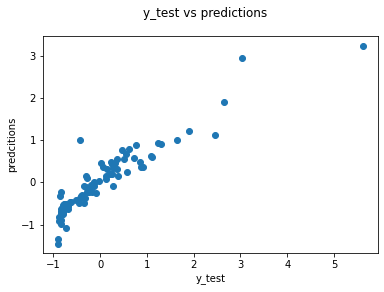

In [19]:
predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

Text(0.5, 0.98, 'Residual Analysis')

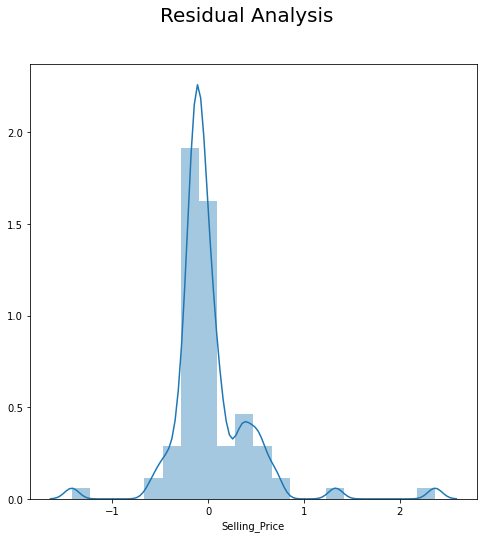

In [20]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-predictions),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

# Comparing these metrics:

<br>MAE is the easiest to understand, because it's the average error.</br>
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.</br>
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.</br>
<br>All of these are loss functions, because we want to minimize them.</br>

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.25222788593717355
MSE: 0.17152491124206032
RMSE: 0.4141556606423004


In [22]:
R2 = metrics.r2_score(y_test,predictions)
R2

0.8316982715837705

In [23]:
# Separating target variable and its features
y = vehicles['Selling_Price']
X = vehicles.drop('Selling_Price',axis=1)

In [24]:
 from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


# Model Creation/Evaluation

# Applying regression models
<br>1.Linear Regression</br>
<br>2.Ridge Regression</br>
<br>3.Lasso Regression</br>
<br>4.Random Forest Regression</br>
<br>5.Gradient Boosting regression</br>

# 1.Linear Regression

In [26]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [27]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


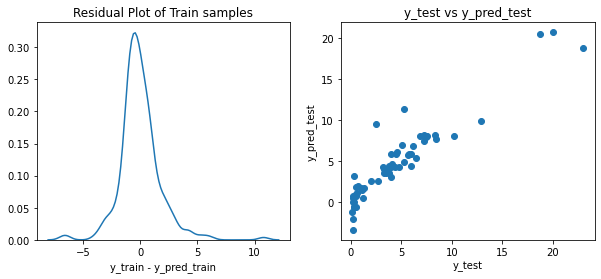

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

# 2.Ridge Regression

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912126 0.8983878  0.82980292 0.81769305 0.73377277]
Train CV mean : 0.84


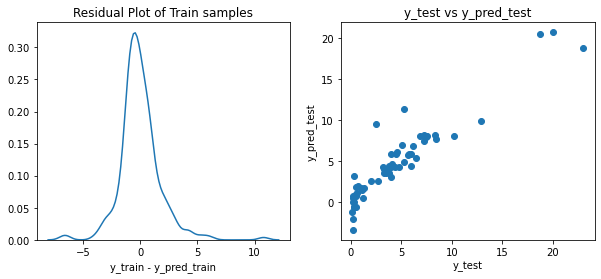

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

# 3.Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.87
Train CV scores : [0.8990973  0.90004457 0.8301628  0.81785432 0.70210321]
Train CV mean : 0.83


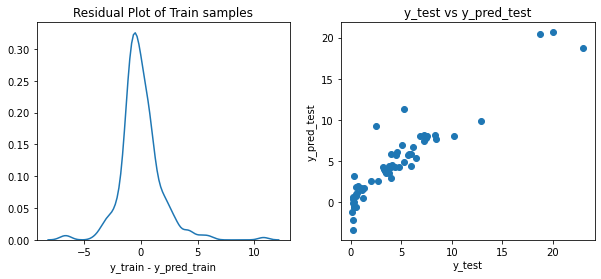

In [31]:
car_pred_model(ls_rs,"lasso.pkl")

# 4.Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.97
Test R2-score : 0.84
Train CV scores : [0.8691458  0.96359634 0.81341867 0.93642393 0.60682526]
Train CV mean : 0.84


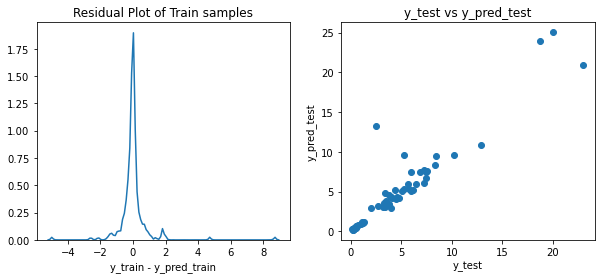

In [33]:
car_pred_model(rf_rs,'random_forest.pkl')

In [34]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=600)


# 5.Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.75
Train CV scores : [0.87782166 0.9055481  0.87156274 0.90331831 0.78784144]
Train CV mean : 0.87


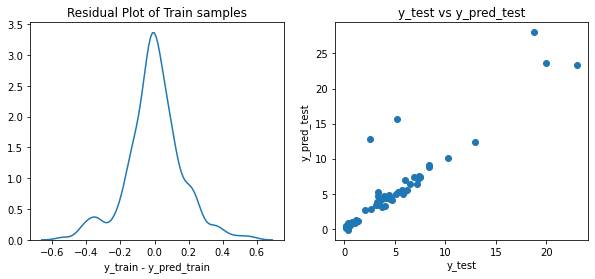

In [36]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [37]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.87,0.83
3,RandomForestRegressor,0.97,0.84,0.84
4,GradientBoostingRegressor,1.00,0.75,0.87


In [39]:
import pickle
# open a file, where you ant to store the data
file = open('modal.pickle', 'wb')

# dump information to that file
pickle.dump(car_pred_model, file)
model = pickle.load(open('modal.pickle', 'rb'))

In [40]:
## Pickle
import pickle

# save model
pickle.dump(gb_rs, open('modal_new.pickle', 'wb'))

# load model
model = pickle.load(open('modal_new.pickle', 'rb'))